## Assignment Question

### Create separate clusters for Male and Female members and give some business insights for Customer Segmentation

In [1]:
# Importing Important Libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the Data

df = pd.read_csv('Mall_Customers_BP.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Getting an idea about the NULL Values

df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# Checking for data types of each column
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
# Separating data based on gender (Genre Column- Male/Female)
dfMale = df[df['Genre']=='Male']
dfMale.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
8,9,Male,64,19,3
10,11,Male,67,19,14
14,15,Male,37,20,13


In [6]:
# Separating data based on gender (Genre Column- Female)
dfFemale = df[df['Genre']=='Female']
dfFemale.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [7]:
print("Number of Total data points: ", len(df))
print("Number of data points having gender as Male: ", len(dfMale))
print("Number of data points having gender as Female: ", len(dfFemale))

Number of Total data points:  200
Number of data points having gender as Male:  88
Number of data points having gender as Female:  112


#### Data Pre-processing and Model Building Steps:

1) Detecting and Removing outliers in the data<br>
2) Scaling<br>
3) Elbow method (Finding optimal number of clustering)<br>

### Considering Male Members Data:

C:\Users\shala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

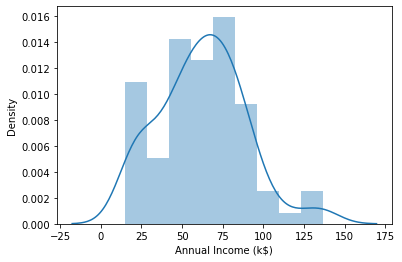

In [8]:
import seaborn as sns

# Detecting Outliers in Annual Income column
sns.distplot(dfMale['Annual Income (k$)'], kde = True)

In [9]:
# Removing the Outliers from Annual Income Column

dfMale = dfMale[dfMale['Annual Income (k$)'] < 125]

C:\Users\shala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

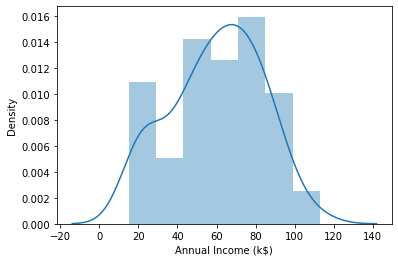

In [10]:
import seaborn as sns

sns.distplot(dfMale['Annual Income (k$)'], kde = True)

C:\Users\shala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

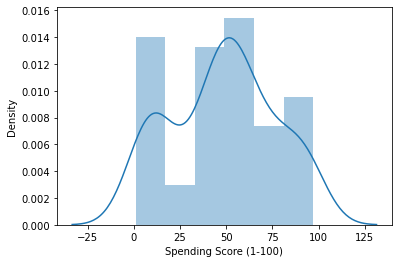

In [11]:
# Detecting Outliers in Spending Score column
sns.distplot(dfMale['Spending Score (1-100)'], kde = True)

There are no outliers present in Spending Score column for Male members, as the distribution curve appeas to be normal.

In [12]:
# Scaling

scaler = StandardScaler()
dfMale[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(dfMale[['Annual Income (k$)', 'Spending Score (1-100)']])
dfMale.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,-1.923268,-0.331604
1,2,Male,21,-1.923268,1.188070
8,9,Male,64,-1.751232,-1.634182
10,11,Male,67,-1.751232,-1.236172
14,15,Male,37,-1.708222,-1.272355


In [13]:
# Elbow Curve

inertiasMale = []
mappingMale = {}
K = range(1, 15)

# Making a separate array file
array1 = dfMale['Annual Income (k$)'].to_numpy()
array2 = dfMale['Spending Score (1-100)'].to_numpy()
arrayMale = np.array(list(zip(array1, array2))).reshape(len(array1), 2)

for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(arrayMale)
    inertiasMale.append(kmeanModel.inertia_)
    mappingMale[k] = kmeanModel.inertia_

C:\Users\shala\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 : 169.99999999999994
2 : 107.77376145481274
3 : 59.98430027931465
4 : 38.97911419497503
5 : 21.37715689535944
6 : 17.956868741223047
7 : 15.40771158139799
8 : 13.166455220841787
9 : 11.332898204958154
10 : 9.973117237437512
11 : 8.80838848842036
12 : 7.882857822072986
13 : 6.560857451472348
14 : 5.796140131926919


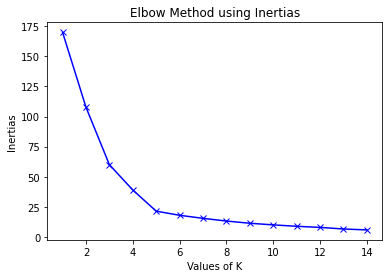

In [14]:
# Using inertia values

for key, val in mappingMale.items():
    print(str(key) + ' : ' + str(val))

# Plot
plt.plot(K, inertiasMale, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertias')
plt.title('Elbow Method using Inertias')
plt.show()

Elbow point is k=5<br>
There is a steep decrease in distortions until k=5<br>
After k=5 there still is a decrease but it is not steep, so k=5 is the optimal number for clusters<br>

In [15]:
# Training the Optimal Model and getting the Centroids

dataMale = pd.DataFrame(arrayMale, columns = ('Annual Income (k$)', 'Spending Score (1-100)'))

kmeansMale = KMeans(n_clusters = 5).fit(dataMale)
centroidsMale = kmeansMale.cluster_centers_
print('Centroids: \n', centroidsMale)

Centroids: 
 [[-0.2142868   0.06108494]
 [ 1.00374375 -1.28441547]
 [ 0.93952869  1.26721981]
 [-1.58457117 -1.1050095 ]
 [-1.45972514  1.06746107]]


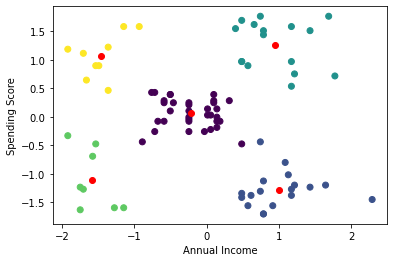

In [16]:
# Plot

plt.scatter(dataMale['Annual Income (k$)'], dataMale['Spending Score (1-100)'], c=kmeansMale.labels_.astype('float'))
plt.scatter(centroidsMale[:, 0], centroidsMale[:, 1], c='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

-------------------------------------------------------------------------------------------------------------------------

### Considering Female Members Data:

C:\Users\shala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

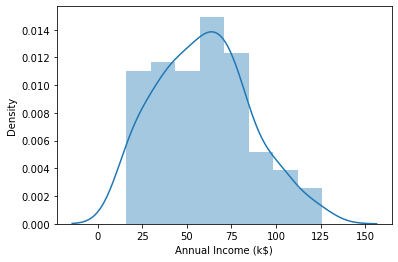

In [17]:
import seaborn as sns

# Detecting Outliers in Annual Income column
sns.distplot(dfFemale['Annual Income (k$)'], kde = True)

There are no outliers present in Annual Income column for Female members, as the distribution curve appeas to be normal.

C:\Users\shala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

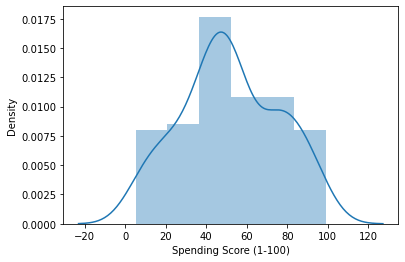

In [18]:
# Detecting Outliers in Spending Score column
sns.distplot(dfFemale['Spending Score (1-100)'], kde = True)

There are no outliers present in Spending Score column for Female members, as the distribution curve appeas to be normal.

In [19]:
# Scaling

scaler = StandardScaler()
dfFemale[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(dfFemale[['Annual Income (k$)', 'Spending Score (1-100)']])
dfFemale.head()

C:\Users\shala\AppData\Local\Temp\ipykernel_8568\3537041505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFemale[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(dfFemale[['Annual Income (k$)', 'Spending Score (1-100)']])


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,-1.670170,-1.896392
3,4,Female,23,-1.670170,1.061072
4,5,Female,31,-1.631553,-0.480142
5,6,Female,22,-1.631553,1.019418
6,7,Female,35,-1.592937,-1.896392


In [20]:
# Elbow Curve

inertiasFemale = []
mappingFemale = {}
K = range(1, 15)

# Making a separate array file
array1 = dfFemale['Annual Income (k$)'].to_numpy()
array2 = dfFemale['Spending Score (1-100)'].to_numpy()
arrayFemale = np.array(list(zip(array1, array2))).reshape(len(array1), 2)

for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(arrayFemale)
    inertiasFemale.append(kmeanModel.inertia_)
    mappingFemale[k] = kmeanModel.inertia_

C:\Users\shala\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 : 224.0
2 : 148.0507045126336
3 : 95.31949900304222
4 : 61.16940212391398
5 : 34.938831968491655
6 : 29.370560494817077
7 : 24.52312615431779
8 : 19.71821685876475
9 : 16.82131272939267
10 : 14.882778655117658
11 : 13.575526534110793
12 : 11.63699268264164
13 : 10.6462865399842
14 : 9.789693721330252


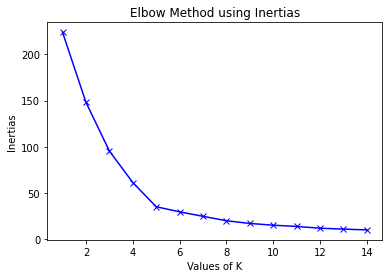

In [21]:
# Using inertia values

for key, val in mappingFemale.items():
    print(str(key) + ' : ' + str(val))

# Plot
plt.plot(K, inertiasFemale, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertias')
plt.title('Elbow Method using Inertias')
plt.show()

Elbow point is k=5<br>
There is a steep decrease in distortions until k=5<br>
After k=5 there still is a decrease but it is not steep, so k=5 is the optimal number for clusters<br>

In [22]:
# Training the Optimal Model and getting the Centroids

dataFemale = pd.DataFrame(arrayFemale, columns = ('Annual Income (k$)', 'Spending Score (1-100)'))

kmeansFemale = KMeans(n_clusters = 5).fit(dataFemale)
centroidsFemale = kmeansFemale.cluster_centers_
print('Centroids: \n', centroidsFemale)

Centroids: 
 [[-0.1817501  -0.08351907]
 [-1.23159527 -1.24182259]
 [ 1.15099068 -1.15818314]
 [ 1.03483425  1.25545945]
 [-1.29588563  1.20846472]]


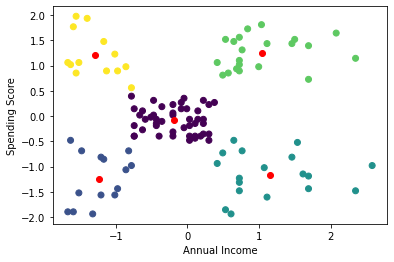

In [23]:
# Plot

plt.scatter(dataFemale['Annual Income (k$)'], dataFemale['Spending Score (1-100)'], c=kmeansFemale.labels_.astype('float'))
plt.scatter(centroidsFemale[:, 0], centroidsFemale[:, 1], c='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

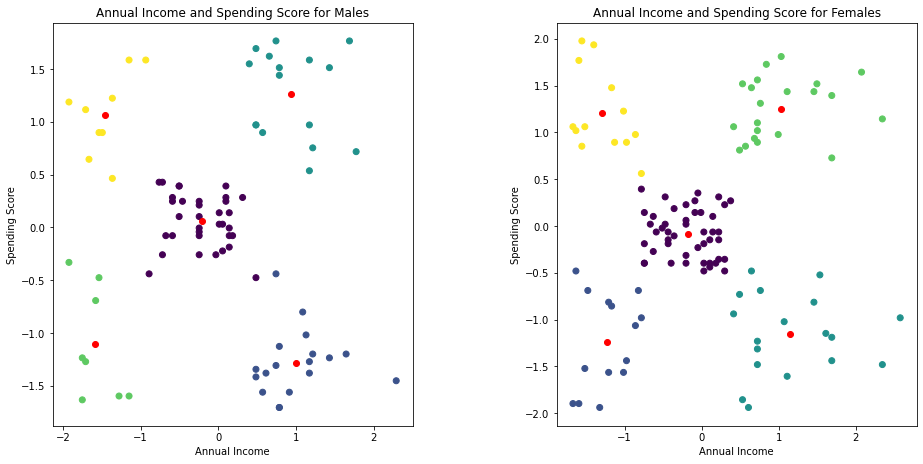

In [27]:
# Comparing Male and Female Clusters

fig, ax = plt.subplots(2, 2, figsize=(15,7))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(1, 2, 1)
plt.scatter(dataMale['Annual Income (k$)'], dataMale['Spending Score (1-100)'], c=kmeansMale.labels_.astype('float'))
plt.scatter(centroidsMale[:, 0], centroidsMale[:, 1], c='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title("Annual Income and Spending Score for Males")

plt.subplot(1, 2, 2)
plt.scatter(dataFemale['Annual Income (k$)'], dataFemale['Spending Score (1-100)'], c=kmeansFemale.labels_.astype('float'))
plt.scatter(centroidsFemale[:, 0], centroidsFemale[:, 1], c='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title("Annual Income and Spending Score for Females")

plt.show()

BUSINESS INSIGHTS FOR FEMALE AND MALE CLUSTERS:<br><br>

----------------------------------------------------------------------------

Cluster 1 for Females and Males (Bottom Left):
LOW Annual Income and LOW Spending Score<br>
Green coloured cluster for Males, Dark-Blue cluster for Females

----------------------------------------------------------------------------

Cluster 2 for Females and Males (Top Left):
LOW Annual Income but HIGH Spending Score<br>
Yellow coloured cluster for Males, Yellow cluster for Females

----------------------------------------------------------------------------

Cluster 3 for Females and Males (Center):
MEDIUM Annual Income and MEDIUM Spending Score<br>
Purple coloured cluster for Males, Purple cluster for Females

----------------------------------------------------------------------------

Cluster 4 for Females and Males (Bottom Right):
HIGH Annual Income but LOW Spending Score<br>
Dark-Blue coloured cluster for Males, Peacock-Green cluster for Females

----------------------------------------------------------------------------

Cluster 5 for Females and Males (Top Right):
HIGH Annual Income and HIGH Spending Score<br>
Peacock-Green coloured cluster for Males, Green cluster for Females

----------------------------------------------------------------------------


Comparing Clusters 1 and 2 of Males and Females, (Green and Yellow clusters of Males, versus Dark-Blue and Yellow clusters of Females) <br>
<i>There are more Females having low Annual Income compared to Males</i><br><br>

Having a glimpse at all the Female clusters,<br>
<i>Most of the Females have medium Annual Income and medium Spending Score</i><br><br>

Considering Cluster 5 of Males and Females, (Peacock-Green cluster of Males, and Green cluster of Females)<br>
<i>There are more Females having high Annual Income and high Spending Score, compared to Males</i><br><br>

Focusing on Clusters 1 and 2 of Males, (Green and Yellow clusters of Males)<br>
<i>Males rarely have low Annual Income, irrespective of their Spending Score</i><br><br>

Viewing Cluster 4 of Females, (Peacock-Green cluster of Females)<br>
<i>There are fewer Females having low Spending Score but higher Annual Income</i><br><br>

Observing Clusters 2 and 5 of Males and Females, (Yellow and Peacock-Green clusters of Males, versus Yellow and Green clusters of Females) <br>
<i>Females have high Spending Score in general, aloof their Annual Income</i>

----------------------------------------------------------------------------